In [1]:
BAN_ANNOTATORS = [
    "annotator_2@mail.com",
    "annotator_5@mail.com",
    "annotator_6@mail.com",
    "annotator_8@mail.com",
    "annotator_10@mail.com"
]

In [2]:
TRANSLATION_TOPICS = {
    "Rapport qualité-prix": "Value for Money",
    "Ambiance": "Ambience",
    "Chambre": "Room",
    "Emplacement": "Location",
    "Personnel": "Staff"
}

In [3]:
ALIAS_MODEL = {
    "Mistral-Small-3.2-24B-Instruct-2506": "Mistral-3.2-24B",
    "gemma-3-27b-it": "Gemma-3-27B",
    "gemma-3-12b-it": "Gemma-3-12B",
    "Llama-3.1-8B-Instruct": "Llama-3.1-8B",
    "Mistral-Nemo-Instruct-FP8-2407": "Mistral-Nemo-12B",
    "Ministral-8B-Instruct-2410": "Ministral-8B",
    "Llama-3.3-70B-Instruct": "Llama-3.3-70B"
}

In [4]:
import pandas as pd

# Load TSV
df = pd.read_csv("../data/score/mattcoef_models.tsv", sep="\t")

# 1. Remove 'keywords-' prefix in 'Model'
df = df[~df['Model_1'].str.contains('1B|3B|keywords-|Llama-3.3-70B-Instruct-FP8')]
df = df[~df['Model_2'].str.contains('1B|3B|keywords-|Llama-3.3-70B-Instruct-FP8')]



# Melt to long format
df_long = df.melt(
    id_vars=["Model_1", "Model_2", "Annotator_1", "Annotator_2", "V"],
    var_name="Topic",
    value_name="MCC"
)

# Optionally filter annotators
df_long['Model_1'] = df_long['Model_1'].map(ALIAS_MODEL)
df_long['Model_2'] = df_long['Model_2'].map(ALIAS_MODEL)


df_long['Topic'] = df_long['Topic'].map(TRANSLATION_TOPICS)

df= df_long



In [5]:
df

,Model_1,Model_2,Annotator_1,Annotator_2,V,Topic,MCC
0,Mistral-3.2-24B,Gemma-3-27B,annotator_13@mail.com,annotator_13@mail.com,sample,Room,0.852585
1,Mistral-3.2-24B,Gemma-3-27B,annotator_13@mail.com,annotator_3@mail.com,sample,Room,0.787275
2,Mistral-3.2-24B,Gemma-3-27B,annotator_13@mail.com,annotator_4@mail.com,sample,Room,0.777966
3,Mistral-3.2-24B,Gemma-3-27B,annotator_13@mail.com,annotator_10@mail.com,sample,Room,0.797117
4,Mistral-3.2-24B,Gemma-3-27B,annotator_13@mail.com,annotator_8@mail.com,sample,Room,0.778467
...,...,...,...,...,...,...,...
35485,Llama-3.3-70B,Mistral-Nemo-12B,annotator_2@mail.com,annotator_6@mail.com,full,Staff,0.875823
35486,Llama-3.3-70B,Mistral-Nemo-12B,annotator_2@mail.com,annotator_9@mail.com,full,Staff,0.889638
35487,Llama-3.3-70B,Mistral-Nemo-12B,annotator_2@mail.com,annotator_12@mail.com,full,Staff,0.877751
35488,Llama-3.3-70B,Mistral-Nemo-12B,annotator_2@mail.com,annotator_11@mail.com,full,Staff,0.877412


In [6]:
def model_size_category(model_name):
    import re
    match = re.search(r'(\d+(?:\.\d+)?)B', model_name)
    if match:
        size = int(match.group(1))
        if size > 14 and size < 70: return '20'
        return str(size)
    else:
        return 'unknown'

df['Size_1'] = df['Model_1'].apply(model_size_category)
df['Size_2'] = df['Model_2'].apply(model_size_category)

# Create an unordered pair category
df['Size_pair'] = df[['Size_1', 'Size_2']].apply(lambda x: ' - '.join(sorted(x)), axis=1)

def model_family(model_name):
    return model_name[:2].upper()  # Convert to uppercase to standardize

# Apply to each model
df['Family_1'] = df['Model_1'].apply(model_family)
df['Family_2'] = df['Model_2'].apply(model_family)

# Check if they are the same family
df['Same_Family'] = df['Family_1'] == df['Family_2']

df['Family_pair'] = df[['Family_1', 'Family_2']].apply(lambda x: ' - '.join(sorted(x)), axis=1)


df['Model_pair'] =  df[['Model_1', 'Model_2']].apply(lambda x: ' X '.join(sorted(x)), axis=1)

In [7]:
df

,Model_1,Model_2,Annotator_1,Annotator_2,V,Topic,MCC,Size_1,Size_2,Size_pair,Family_1,Family_2,Same_Family,Family_pair,Model_pair
0,Mistral-3.2-24B,Gemma-3-27B,annotator_13@mail.com,annotator_13@mail.com,sample,Room,0.852585,20,20,20 - 20,MI,GE,False,GE - MI,Gemma-3-27B X Mistral-3.2-24B
1,Mistral-3.2-24B,Gemma-3-27B,annotator_13@mail.com,annotator_3@mail.com,sample,Room,0.787275,20,20,20 - 20,MI,GE,False,GE - MI,Gemma-3-27B X Mistral-3.2-24B
2,Mistral-3.2-24B,Gemma-3-27B,annotator_13@mail.com,annotator_4@mail.com,sample,Room,0.777966,20,20,20 - 20,MI,GE,False,GE - MI,Gemma-3-27B X Mistral-3.2-24B
3,Mistral-3.2-24B,Gemma-3-27B,annotator_13@mail.com,annotator_10@mail.com,sample,Room,0.797117,20,20,20 - 20,MI,GE,False,GE - MI,Gemma-3-27B X Mistral-3.2-24B
4,Mistral-3.2-24B,Gemma-3-27B,annotator_13@mail.com,annotator_8@mail.com,sample,Room,0.778467,20,20,20 - 20,MI,GE,False,GE - MI,Gemma-3-27B X Mistral-3.2-24B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35485,Llama-3.3-70B,Mistral-Nemo-12B,annotator_2@mail.com,annotator_6@mail.com,full,Staff,0.875823,70,12,12 - 70,LL,MI,False,LL - MI,Llama-3.3-70B X Mistral-Nemo-12B
35486,Llama-3.3-70B,Mistral-Nemo-12B,annotator_2@mail.com,annotator_9@mail.com,full,Staff,0.889638,70,12,12 - 70,LL,MI,False,LL - MI,Llama-3.3-70B X Mistral-Nemo-12B
35487,Llama-3.3-70B,Mistral-Nemo-12B,annotator_2@mail.com,annotator_12@mail.com,full,Staff,0.877751,70,12,12 - 70,LL,MI,False,LL - MI,Llama-3.3-70B X Mistral-Nemo-12B
35488,Llama-3.3-70B,Mistral-Nemo-12B,annotator_2@mail.com,annotator_11@mail.com,full,Staff,0.877412,70,12,12 - 70,LL,MI,False,LL - MI,Llama-3.3-70B X Mistral-Nemo-12B


In [8]:
df_ban_corr = df[~(df["Annotator_1"].isin(BAN_ANNOTATORS) & df["Annotator_2"].isin(BAN_ANNOTATORS) & df["V"] == "full")]

In [9]:
correlations = df_ban_corr

In [10]:
df_ban_corr.head().to_clipboard()

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
d_model = dict()
for m1, m2, t, k in zip(df_ban_corr['Model_1'], df_ban_corr['Model_2'], df_ban_corr['Topic'], df_ban_corr['MCC']):
    if m1 not in d_model: d_model[m1] = {m: {t: [] for t in TRANSLATION_TOPICS.values()} for m in ALIAS_MODEL.values() if m != m1}
    if m2 not in d_model: d_model[m2] = {m: {t: [] for t in TRANSLATION_TOPICS.values()} for m in ALIAS_MODEL.values() if m != m2}
    d_model[m1][m2][t].append(k)
    d_model[m2][m1][t].append(k)

In [13]:
import pandas as pd

rows = []

for m1, others in d_model.items():
    for m2, topics in others.items():
        for topic, values in topics.items():
            if m1 == m2: print(m1,m2)
            for v in values:  # keep all MCCs to compute SD
                rows.append({
                    "Model_1": m1,
                    "Model_2": m2,
                    "Topic": topic,
                    "MCC": v
                })

df_plot = pd.DataFrame(rows)


In [14]:
def extract_size(model_name):
    return int(model_name.split('-')[-1].replace('B',''))

model_order = sorted(df_plot['Model_1'].unique(), key=extract_size)

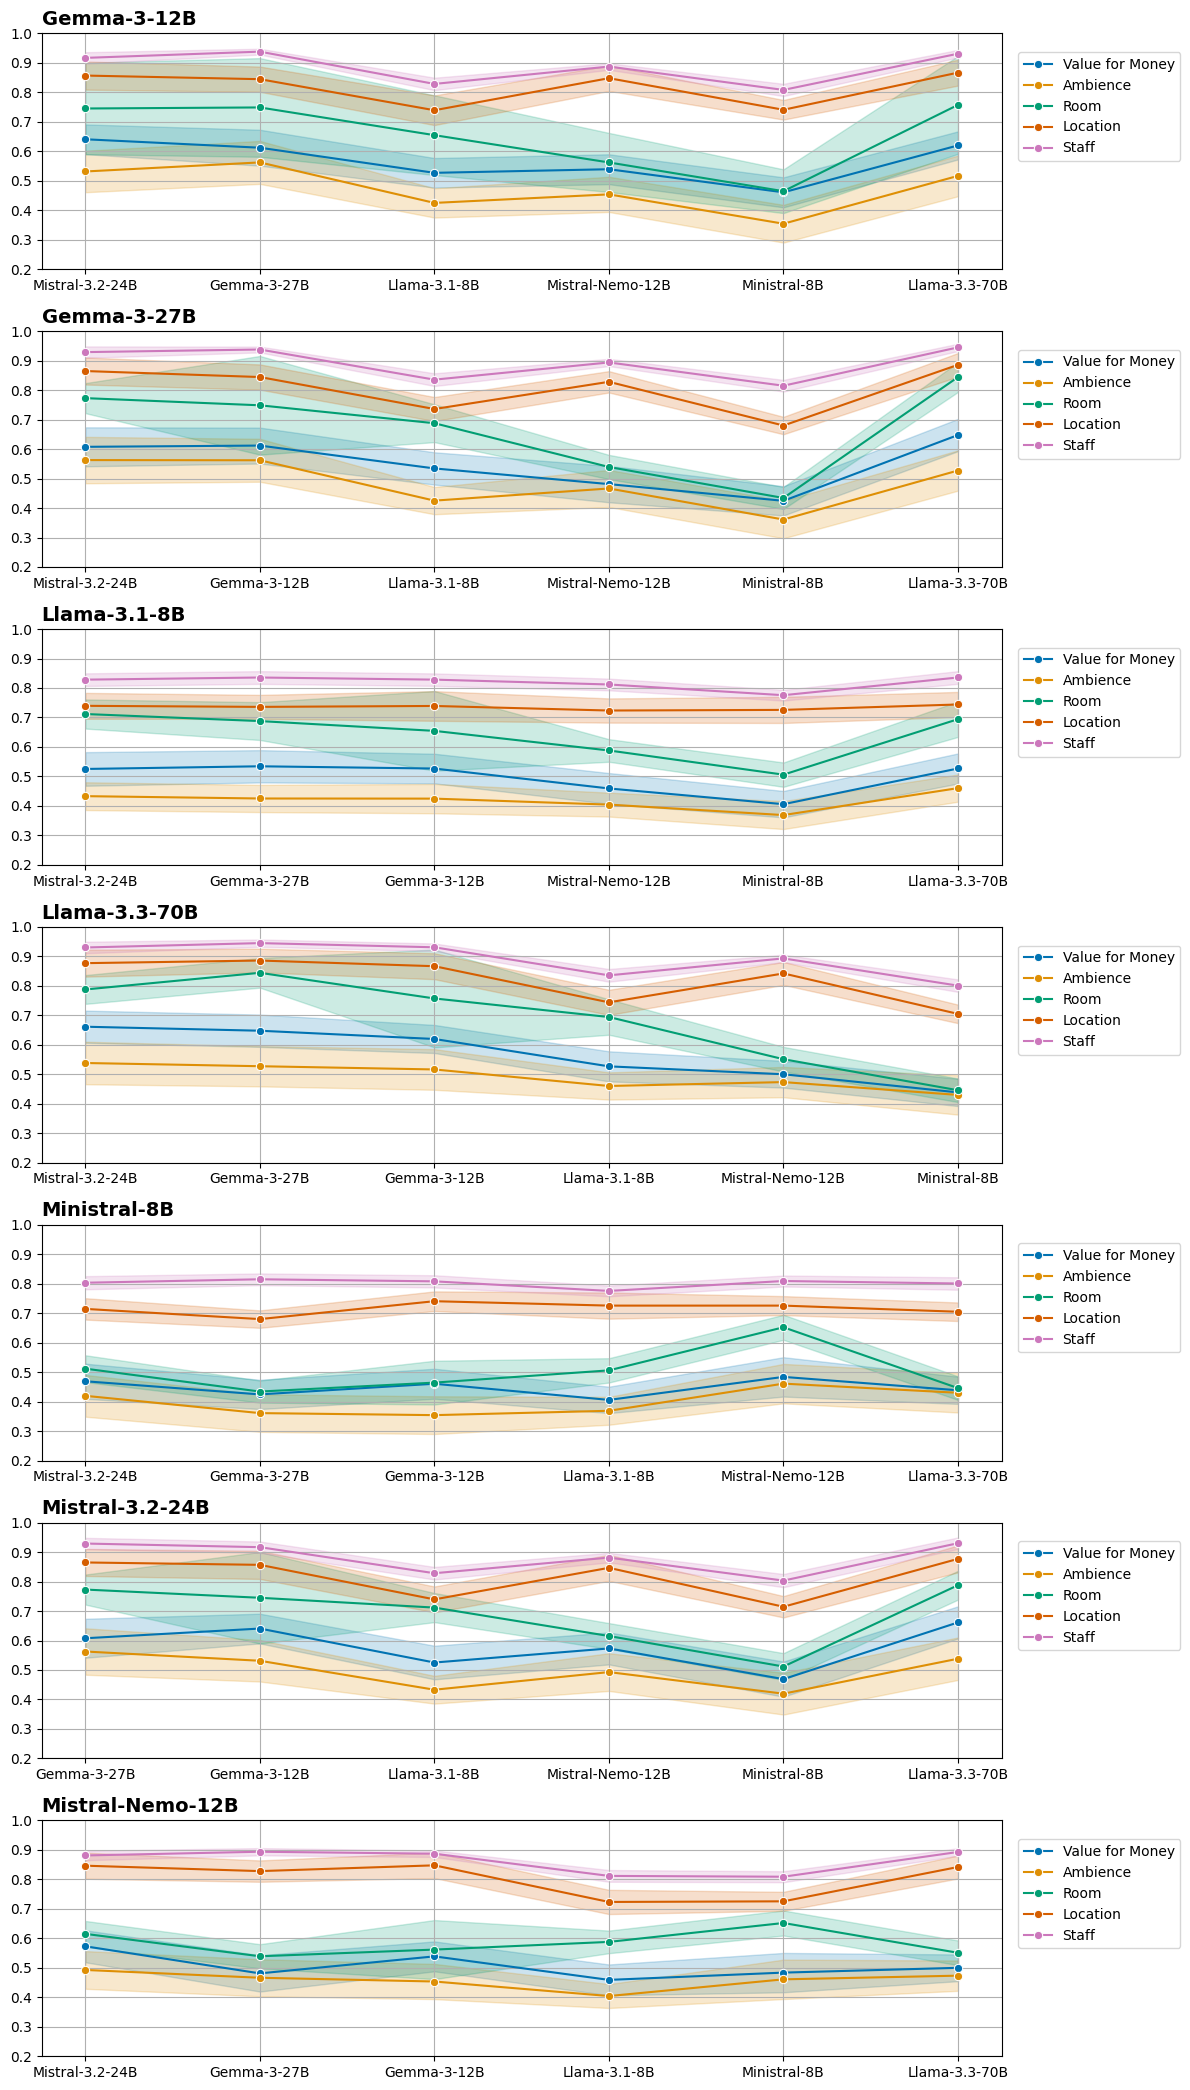

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure Model_2 is string

# Aggregate MCC by mean per Model_1, Model_2, Topic

model_1_list = df_plot['Model_1'].unique()
n_models = len(model_1_list)

fig, axes = plt.subplots(n_models, 1, figsize=(12, 3 * n_models), sharex=False)
if n_models == 1:
    axes = [axes]

legend_handles, legend_labels = None, None

for ax, (m1, df_m1) in zip(axes, df_plot.groupby('Model_1')):
    sns.lineplot(
        data=df_m1,
        x='Model_2',
        y='MCC',
        hue='Topic',
        marker='o',
        palette='colorblind',
        ax=ax,
        errorbar="sd"
    )

    # Capture legend once
    if legend_handles is None:
        legend_handles, legend_labels = ax.get_legend_handles_labels()
        if 'Model_2' in legend_labels:
            idx = legend_labels.index('Model_2')
            legend_handles.pop(idx)
            legend_labels.pop(idx)

    # Remove subplot legend

    ax.grid(True)
    ax.set_title(f"{m1}", loc='left', fontsize=14, fontweight='bold')
    ax.set_ylabel('', fontsize=10)
    ax.set_xlabel('', fontsize=10)  # <-- x-label for every subplot
    ax.set_ylim(.2, 1)
    ax.legend(legend_handles, legend_labels, bbox_to_anchor=(1.01, 0.95), loc='upper left')


axes[-1].set_xlabel('')
plt.xticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig('inter-model.png')
plt.show()
